In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Load the graph from the edge list file
G = nx.read_weighted_edgelist('male_graph.edgelist')
print(f"Node: {len(G.nodes())}")
pos = nx.spring_layout(G, iterations=50)

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_size=50)

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show()

Node: 995


C:\Users\nick\AppData\Local\Temp\ipykernel_17348\1441160377.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, node_size=50, node_color=cluster_colors, cmap=plt.cm.get_cmap('tab10', len(set(cluster_colors))))


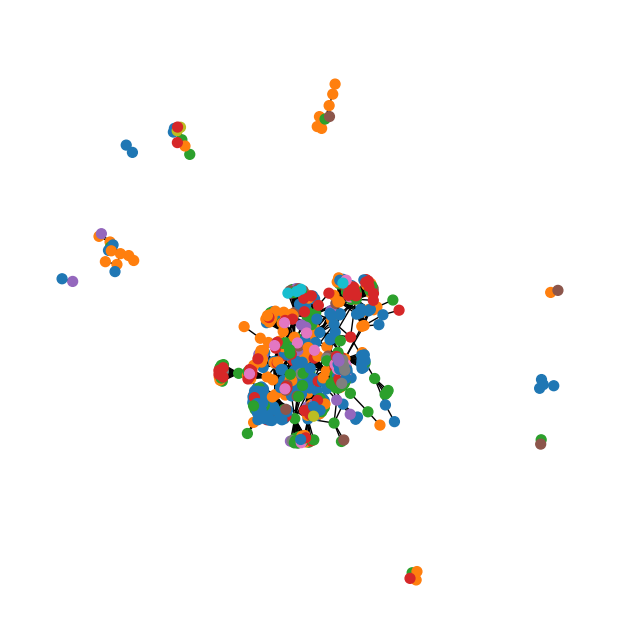

In [31]:
clustering_louvain = pd.read_csv('male_clusters_Leiden.csv')
# Create a dictionary to store node to cluster mapping
node_to_cluster = dict(zip(clustering_louvain['vertex_id'], clustering_louvain['cluster_id']))

# Create a list of colors based on clusters (different color for each cluster)
cluster_colors = [node_to_cluster[int(node)] for node in G.nodes()]

# Create a layout for the graph with more iterations for better positioning
pos = nx.spring_layout(G, iterations=50)  # Increase iterations to improve the layout


# Plot the graph with node colors based on their clusters
plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_size=50, node_color=cluster_colors, cmap=plt.cm.get_cmap('tab10', len(set(cluster_colors))))

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show()

C:\Users\nick\AppData\Local\Temp\ipykernel_17348\839731811.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, node_size=50, node_color=cluster_colors, cmap=plt.cm.get_cmap('tab10', len(set(cluster_colors))))


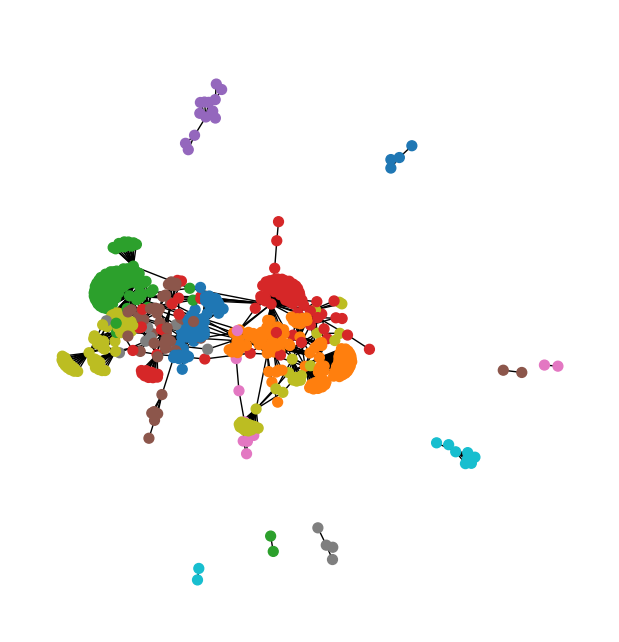

In [29]:
clustering_louvain = pd.read_csv('male_clusters_Louvain.csv')
# Create a dictionary to store node to cluster mapping
node_to_cluster = dict(zip(clustering_louvain['vertex_id'], clustering_louvain['cluster_id']))

# Create a list of colors based on clusters (different color for each cluster)
cluster_colors = [node_to_cluster[int(node)] for node in G.nodes()]

# Create a layout for the graph with more iterations for better positioning
pos = nx.spring_layout(G, iterations=40)  # Increase iterations to improve the layout

# Alternatively, you can try a different layout (e.g., Kamada-Kawai):
# pos = nx.kamada_kawai_layout(G)

# Plot the graph with node colors based on their clusters
plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_size=50, node_color=cluster_colors, cmap=plt.cm.get_cmap('tab10', len(set(cluster_colors))))

# Add title and show the plot
plt.title("Graph Partitioned into Communities (Clusters)")
plt.show()